In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

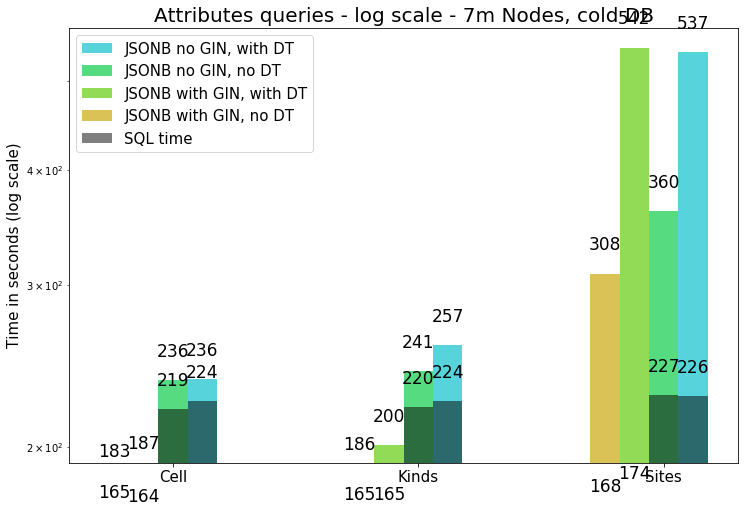

In [11]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this benchmark we check the benefits of a GIN index.
# We query the full database of 7 milion nodes.
###### Cold DB ######

# More specifically, we query the full database (7m nodes) for different kinds of attributes (cell, kinds, sites)
# - With the GIN index (no datetime conversion)
# - Without the GIN index (no datetime conversion)
# - With the GIN index (with datetime conversion)
# - Without the GIN index (with datetime conversion)

# Data come from the following files:
# speed_tests_aiida_gin_test_jsonb_with_gin_full_db.txt
# speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime_full_db.txt
# speed_tests_aiida_gin_test_jsonb_without_gin_full_db.txt
# speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime_full_db.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy (With GIN index on attributes)
# - aiida_dj_jsonb_original_seb_copy_m37 (Without GIN index on attributes)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime_full_db.txt
jsonb_with_gin_no_dt = [183.74033308, 186.9541471, 308.367831945]
jsonb_with_gin_no_dt_sql = [165.953827, 165.097775, 168.523215]

# - speed_tests_aiida_gin_test_jsonb_with_gin_full_db.txt
jsonb_with_gin_with_dt = [187.599026918, 200.634115934, 542.809581041]
jsonb_with_gin_with_dt_sql = [164.199090, 165.048180, 174.038137]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime_full_db.txt
jsonb_no_gin_no_dt = [236.362234116, 241.657644987, 360.347086906]
jsonb_no_gin_no_dt_sql = [219.554003, 220.621377, 227.500587]

# - speed_tests_aiida_gin_test_jsonb_without_gin_full_db.txt
jsonb_no_gin_with_dt = [246.325621843, 257.859483004, 537.301084042]
jsonb_no_gin_with_dt_sql = [224.274754, 224.152047, 226.745693]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects2 = ax.bar(ind + 0 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 1 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 2 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 3 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects2_sql = ax.bar(ind + 0 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 1 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 2 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 3 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 7m Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects5[0], rects4[0], rects3[0], rects2[0], rects2_sql[0]), (
    # Order of columns
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_cold_gin_comparison.svg")

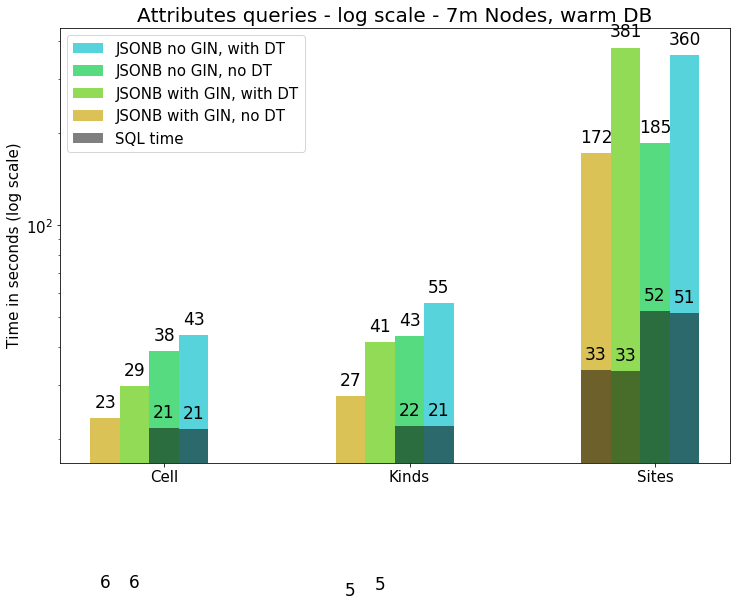

In [12]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this benchmark we check the benefits of a GIN index.
# We query the full database of 7 milion nodes.
###### Warm DB ######

# More specifically, we query the full database (7m nodes) for different kinds of attributes (cell, kinds, sites)
# - With the GIN index (no datetime conversion)
# - Without the GIN index (no datetime conversion)
# - With the GIN index (with datetime conversion)
# - Without the GIN index (with datetime conversion)

# Data come from the following files:
# speed_tests_aiida_gin_test_jsonb_with_gin_full_db.txt
# speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime_full_db.txt
# speed_tests_aiida_gin_test_jsonb_without_gin_full_db.txt
# speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime_full_db.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy (With GIN index on attributes)
# - aiida_dj_jsonb_original_seb_copy_m37 (Without GIN index on attributes)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime_full_db.txt
jsonb_with_gin_no_dt = [23.4506590366, 27.5118591785, 172.645806074]
jsonb_with_gin_no_dt_sql = [6.043146, 5.662142, 33.534855]

# - speed_tests_aiida_gin_test_jsonb_with_gin_full_db.txt
jsonb_with_gin_with_dt = [29.7085170746, 41.512198925, 381.552370787]
jsonb_with_gin_with_dt_sql = [6.014988, 5.936686, 33.437821]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime_full_db.txt
jsonb_no_gin_no_dt = [38.6760439873, 43.3336350918, 185.8043859]
jsonb_no_gin_no_dt_sql = [21.701525, 22.075379, 52.539634]

# - speed_tests_aiida_gin_test_jsonb_without_gin_full_db.txt
jsonb_no_gin_with_dt = [43.7917358875, 55.6413209438, 360.294378996]
jsonb_no_gin_with_dt_sql = [21.552887, 21.966787, 51.780784]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects2 = ax.bar(ind + 0 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 1 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 2 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 3 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects2_sql = ax.bar(ind + 0 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 1 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 2 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 3 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 7m Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects5[0], rects4[0], rects3[0], rects2[0], rects2_sql[0]), (
    # Order of columns
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_cold_gin_comparison.svg")

In [13]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 200k nodes - part of group 20160222-225236 - Cold DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB with date time conversion and without (no GIN index)
# Django JSONB with date time conversion and without (with GIN index)
# To perform these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario)

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [9.35270285607, 11.56444215767, 978.4822318556]
eav_with_dt_sql = [6.663198, 6.003877, 19.47583]

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
jsonb_with_gin_no_dt = [3.6593298912, 9.00030589104, 17.9672989845]
jsonb_with_gin_no_dt_sql = [3.286624, 8.506603, 13.712152]

# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
jsonb_with_gin_with_dt = [3.93455719948, 4.04606103897, 14.3958449364]
jsonb_with_gin_with_dt_sql = [3.501935, 3.34781, 4.297546]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [3.07630491257, 3.54275012016, 7.31332492828]
jsonb_no_gin_no_dt_sql = [2.694164, 3.037004, 3.310800]

# - speed_tests_aiida_gin_test_jsonb_without_gin.txt
jsonb_no_gin_with_dt = [3.55677199364, 4.12142395973, 12.8562459946]
jsonb_no_gin_with_dt_sql = [3.098827, 3.220579, 3.0523052151151]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects2 = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects2_sql = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects1_sql[0]), (
    # Order of columns
    'EAV with DT', 
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_200_cold_gin_comparison.svg")

SyntaxError: invalid syntax (<ipython-input-13-18c667be4d4b>, line 53)

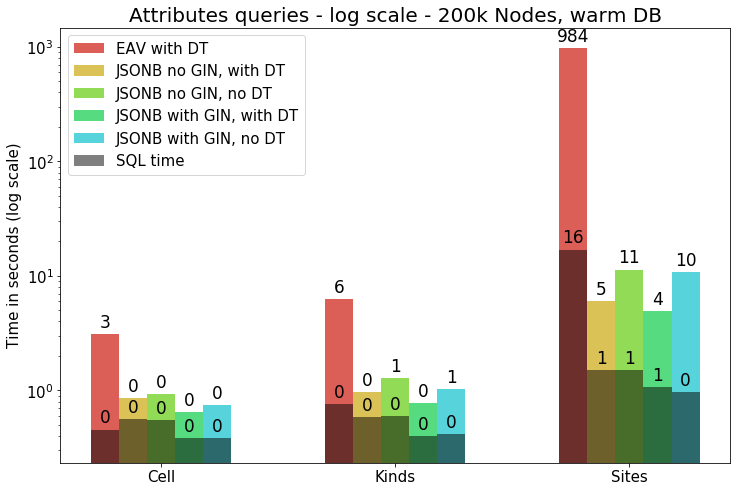

In [14]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 200k nodes - part of group 20160222-225236 - Warm DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB with date time conversion and without (no GIN index)
# Django JSONB with date time conversion and without (with GIN index)
# To perform these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario)

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [3.11252713203, 6.31108617783, 984.9762549404]
eav_with_dt_sql = [0.455174, 0.753454, 16.977622]

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
jsonb_with_gin_no_dt = [0.859820842743, 0.960223913193, 5.994836092]
jsonb_with_gin_no_dt_sql = [0.565242, 0.585325, 1.498050]

# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
jsonb_with_gin_with_dt = [0.93057012558, 1.27859187126, 11.3756678104]
jsonb_with_gin_with_dt_sql = [0.553831, 0.592150, 1.504833]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [0.646707057953, 0.781686067581, 4.96505308151]
jsonb_no_gin_no_dt_sql = [0.381083, 0.402509, 1.069119]

# - speed_tests_aiida_gin_test_jsonb_without_gin.txt
jsonb_no_gin_with_dt = [0.745865106583, 1.0316829681, 10.7802519798]
jsonb_no_gin_with_dt_sql = [0.385710, 0.413576, 0.975241]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects2 = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects2_sql = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects1_sql[0]), (
    # Order of columns
    'EAV with DT', 
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_200_warm_gin_comparison.svg")

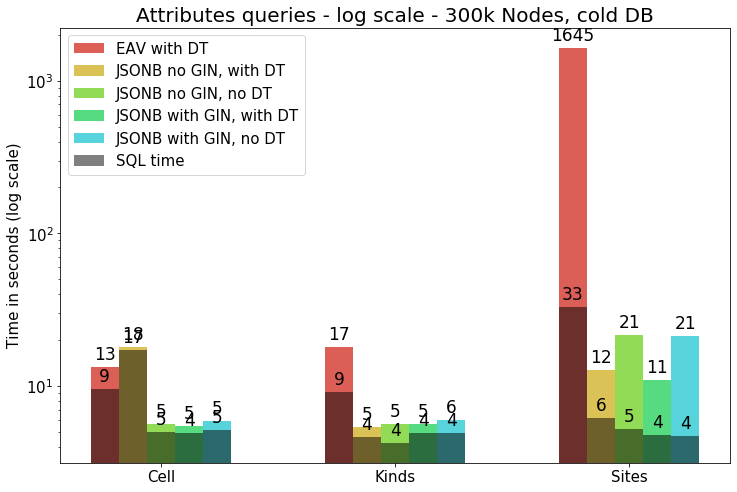

In [7]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 300k nodes - part of group 20160222-225236 - Cold DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB with date time conversion and without (no GIN index)
# Django JSONB with date time conversion and without (with GIN index)
# To perform these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario)

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = [13.40801000591, 17.9830842018, 1645.476661921]
eav_with_dt_sql = [9.581483, 9.230778, 33.131330]

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
jsonb_with_gin_no_dt = [18.1295049191, 5.37302780151, 12.7138750553]
jsonb_with_gin_no_dt_sql = [17.250746, 4.654889, 6.166799]

# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
jsonb_with_gin_with_dt = [5.67470312119, 5.65211200714, 21.7205870152]
jsonb_with_gin_with_dt_sql = [5.026060, 4.226967, 5.282938]

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = [5.50369906425, 5.63258600235, 11.0162718296]
jsonb_no_gin_no_dt_sql = [4.958996, 4.970590, 4.823914]

# - speed_tests_aiida_gin_test_jsonb_without_gin.txt
jsonb_no_gin_with_dt = [5.89082503319, 6.00929498672, 21.2743759155]
jsonb_no_gin_with_dt_sql = [5.134616, 4.975657, 4.718207]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects2 = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects2_sql = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects1_sql[0]), (
    # Order of columns
    'EAV with DT', 
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_300_cold_gin_comparison.svg")

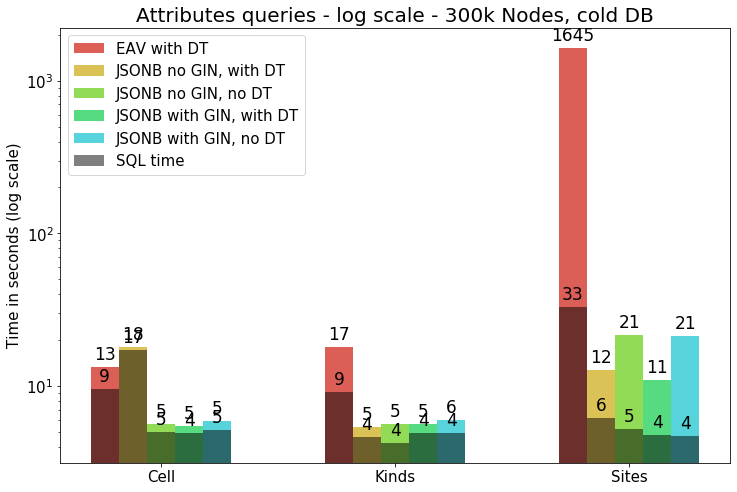

In [7]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# 300k nodes - part of group 20160222-225236 - Warm DB
# The databases contain only these nodes

# We compare the execution time for:
# Django EAV
# Django JSONB with date time conversion and without (no GIN index)
# Django JSONB with date time conversion and without (with GIN index)
# To perform these benchmarks, I removed all the non-interesting nodes
# from the database. This was needed to force the database to use the
# GIN index (in the GIN index scenario)

# Data come from the following files:
# - speed_tests_aiida_gin_test_eav.txt
#     - the total time reported in the graphs is the addition of query time 
#       and serialization time. The SQL time is the time reported by PostgreSQL
# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
# - speed_tests_aiida_gin_test_jsonb_without_gin.txt

# Databases used:
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_gin
# - aiida_dj_jsonb_original_seb_copy_m37_copy_200_no_gin
# - aiida_dj_jsonb_original_seb_copy_m36_copy_200_gin

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

# - speed_tests_aiida_gin_test_eav.txt
eav_with_dt = []
eav_with_dt_sql = []

# - speed_tests_aiida_gin_test_jsonb_with_gin_no_datetime.txt
jsonb_with_gin_no_dt = []
jsonb_with_gin_no_dt_sql = []

# - speed_tests_aiida_gin_test_jsonb_with_gin.txt
jsonb_with_gin_with_dt = []
jsonb_with_gin_with_dt_sql = []

# - speed_tests_aiida_gin_test_jsonb_without_gin_no_datetime.txt
jsonb_no_gin_no_dt = []
jsonb_no_gin_no_dt_sql = []

# - speed_tests_aiida_gin_test_jsonb_without_gin.txt
jsonb_no_gin_with_dt = []
jsonb_no_gin_with_dt_sql = []

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.12       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind + 0 * width, eav_with_dt, width, log=True, color=cols[0])
rects2 = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt, width, log=True, color=cols[1])
rects3 = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt, width, log=True, color=cols[2])
rects4 = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt, width, log=True, color=cols[3])
rects5 = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt, width, log=True, color=cols[4])

rects1_sql = ax.bar(ind + 0 * width, eav_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects2_sql = ax.bar(ind + 1 * width, jsonb_with_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects3_sql = ax.bar(ind + 2 * width, jsonb_with_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)
rects4_sql = ax.bar(ind + 3 * width, jsonb_no_gin_no_dt_sql, width, log=True, color='black', alpha=0.5)
rects5_sql = ax.bar(ind + 4 * width, jsonb_no_gin_with_dt_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + 2 * width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects1_sql[0]), (
    # Order of columns
    'EAV with DT', 
    'JSONB no GIN, with DT',
    'JSONB no GIN, no DT',
    'JSONB with GIN, with DT',
    'JSONB with GIN, no DT',
    'SQL time'
), 
fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)

autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)
autolabel(rects3)
autolabel(rects3_sql)
autolabel(rects4)
autolabel(rects4_sql)
autolabel(rects5)
autolabel(rects5_sql)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("attr_queries_300_warm_gin_comparison.svg")

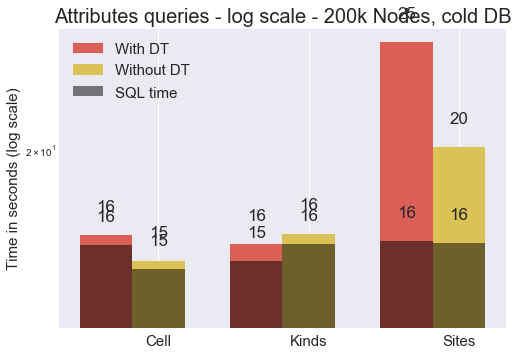

In [3]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# We compare the execution time in DJango JSONB using attributes queries.
# In these graphs we compare the time needed with and without datetime conversion

# 200k nodes - part of group 20160222-225236 - Cold DB

# Data come from the following files:
# speed_tests_aiida_jsonb_small.txt (JSONB - with datetime conversion)
# speed_tests_aiida_jsonb_small_no_datetime.txt (JSONB - without datetime conversion)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

new_schema_with_dt = [16.3869299889, 16.0539438725, 25.7297959328]
new_schema_sql_with_dt = [16.025652, 15.416674, 16.170481]
new_schema_without_dt = [15.4248139858, 16.4456310272, 20.1244819164]
new_schema_sql_without_dt = [15.134946, 16.040837, 16.097701]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, new_schema_with_dt, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema_without_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, new_schema_sql_with_dt, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql_without_dt, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('With DT', 'Without DT', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_cold_with_attr_jsonb_datetime.svg")

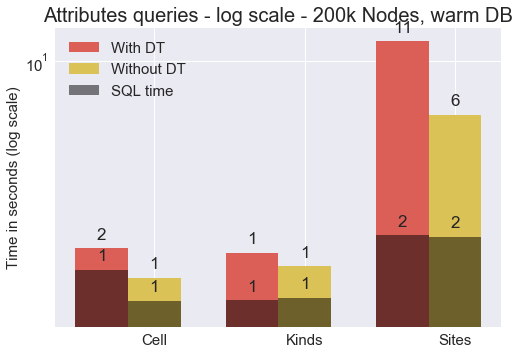

In [4]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# We compare the execution time in DJango JSONB using attributes queries.
# In these graphs we compare the time needed with and without datetime conversion

# 200k nodes - part of group 20160222-225236 - Warm DB

# Data come from the following files:
# speed_tests_aiida_jsonb_small.txt (JSONB - with datetime conversion)
# speed_tests_aiida_jsonb_small_no_datetime.txt (JSONB - without datetime conversion)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

new_schema_with_dt = [2.04142618179, 1.95860099792, 11.8104319572]
new_schema_sql_with_dt = [1.694349, 1.311131, 2.269098]
new_schema_without_dt = [1.5865778923, 1.74661397934, 6.34319591522]
new_schema_sql_without_dt = [1.301824, 1.336381, 2.244781]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, new_schema_with_dt, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema_without_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, new_schema_sql_with_dt, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql_without_dt, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('With DT', 'Without DT', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_warm_with_attr_jsonb_datetime.svg")

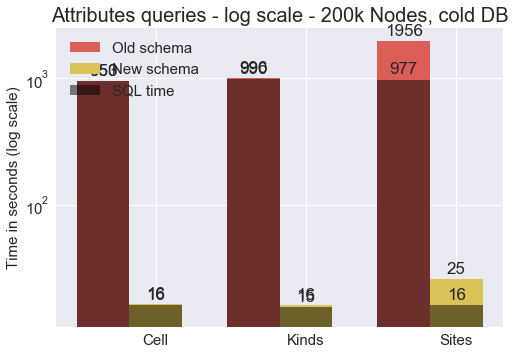

In [5]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# In the EAV case, we issue one SQL query (and not an attribute query per node) and we 
# manipulate the reply at the Python level where reconstruct the attributes

# 200k nodes - part of group 20160222-225236 - Cold DB

# Data come from the following files:
# speed_tests_aiida_eav_small_ser_v3.txt (EAV)
# speed_tests_aiida_jsonb_small.txt (JSONB)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [953.05822396287, 996.03412985778, 1956.507531879]
old_schema_sql = [950.409274, 990.416956, 977.463062]
new_schema = [16.3869299889, 16.0539438725, 25.7297959328]
new_schema_sql = [16.025652, 15.416674, 16.170481]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_cold_with_attr_jsonb_datetime.svg")

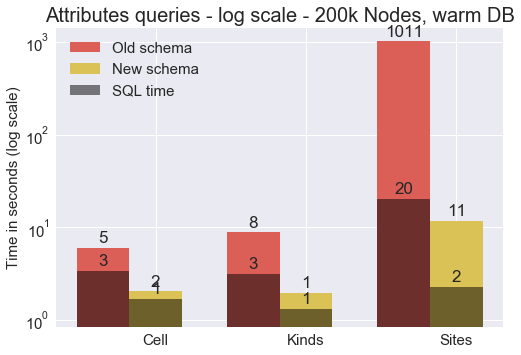

In [6]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# In the EAV case, we issue one SQL query (and not an attribute query per node) and we 
# manipulate the reply at the Python level where reconstruct the attributes

# 200k nodes - part of group 20160222-225236 - Warm DB

# Data come from the following files:
# speed_tests_aiida_eav_small_ser_v3.txt (EAV)
# speed_tests_aiida_jsonb_small.txt (JSONB)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [5.99900102615, 8.78895902634, 1011.8745222088]
old_schema_sql = [3.383515, 3.126176, 20.306761]
new_schema = [2.04142618179, 1.95860099792, 11.8104319572]
new_schema_sql = [1.694349, 1.311131, 2.269098]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_warm_with_attr_ser_one_eav_query.svg")

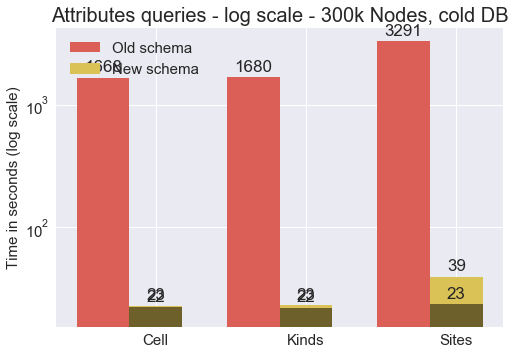

In [7]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# On the other hand since there are many SQL queries (one per node to get the corresponding
# attributes of that node), the SQL time for the Django EAV case can not be estimated.

# 300k nodes - part of group 20160222-225236 - Cold DB

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [1668.982449535, 1680.56568567, 3291.3400147]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])
rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_cold_with_attr_ser.svg")

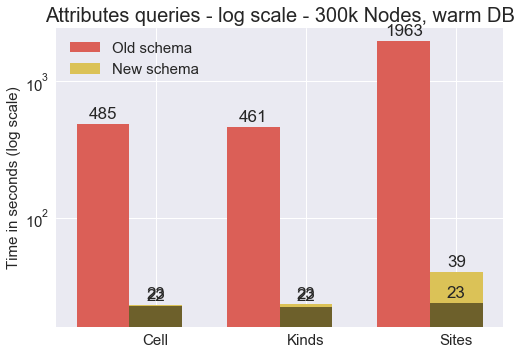

In [8]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# On the other hand since there are many SQL queries (one per node to get the corresponding
# attributes of that node), the SQL time for the Django EAV case can not be estimated.

# 300k nodes - part of group 20160222-225236 - Warm DB

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [485.942664862, 461.350110531, 1963.752602102]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])
rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_warm_with_attr_ser.svg")

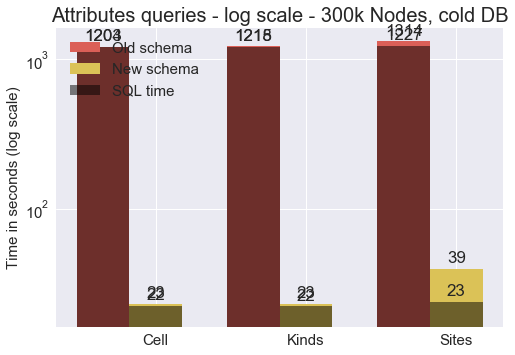

In [9]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236 - Cold DB

# This doesn't contain the de-serialization of the nodes at the Python level (From EAV 
# model to dictionaries)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [1204.76407504, 1218.32961702, 1314.24235487]
old_schema_sql = [1203.164919, 1215.007219, 1227.021945]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_cold.svg")

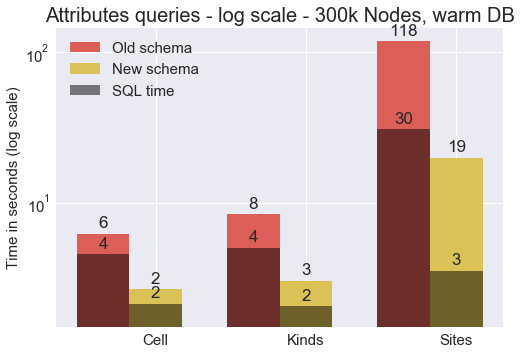

In [10]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236 - Warm DB

# This doesn't contain the de-serialization of the nodes at the Python level (Form EAV 
# model to dictionaries)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [6.17456388474, 8.36090302467, 118.483629942]
old_schema_sql = [4.534682, 4.997428, 30.796353]
new_schema = [2.65073394775, 3.01792001724, 19.8850951195]
new_schema_sql = [2.112355, 2.044650, 3.539986]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_warm.svg")

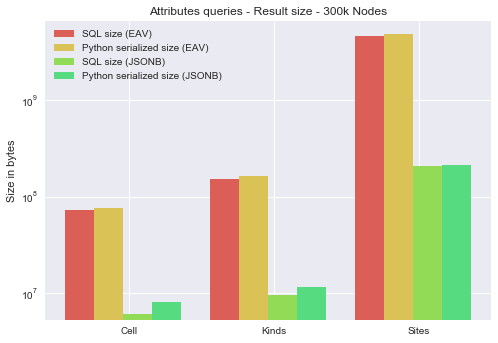

In [11]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236

sql_eav = [72611157, 150982730, 4559616198]
p_eav = [76677702, 163171421, 4779329463]
sql_jsonb = [6151867, 9523353, 208930947]
p_jsonb = [8164031, 11535478, 210500720]

w = 0.20

fig, ax = plt.subplots()
rect1 = ax.bar(ind, sql_eav, w, log=True, color=cols[0])

rect2 = ax.bar(ind + w, p_eav, w, log=True, color=cols[1])

rect3 = ax.bar(ind + w*2, sql_jsonb, w, log=True, color=cols[2])

rect4 = ax.bar(ind + w*3, p_jsonb, w, log=True, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Size in bytes')
ax.set_title('Attributes queries - Result size - 300k Nodes')
ax.set_xticks(ind + w*1.7)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'))

#ax.legend((rect1[0], rect2[0]), ('SQL result size', 'Python serialized result size'), loc=2)
ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('SQL size (EAV)', 'Python serialized size (EAV)', 'SQL size (JSONB)', 'Python serialized size (JSONB)'), loc=2)
plt.savefig("attr_queries_300_size.svg")

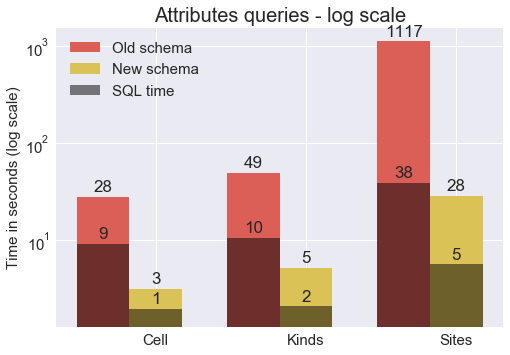

In [12]:
# JSON speed-up experiments performed by Jocelyn

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [28.13, 49.22, 1117.03]
old_schema_sql = [9.18, 10.6, 38.73]
new_schema = [3.13, 5.19, 28.82]
new_schema_sql = [1.96, 2.08, 5.64]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_joc.svg")

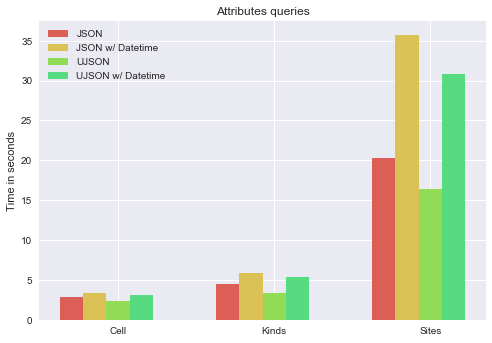

In [13]:
json = [2.90, 4.44, 20.29]
json_dt = [3.36, 5.83, 35.7]
ujson = [2.36, 3.41, 16.40]
ujson_dt = [3.17, 5.40, 30.88]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'), loc=2)

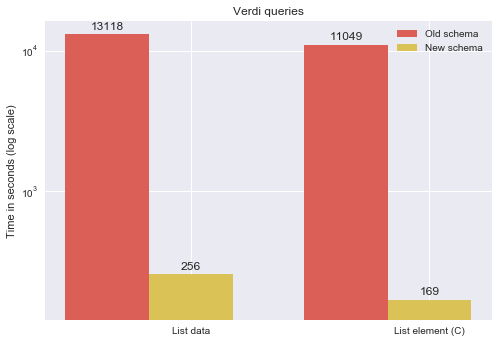

In [14]:
fig, ax = plt.subplots()
ind = np.arange(2)
django = [13118, 11049]
sqla = [256, 169]
width = 0.35
rects1 = ax.bar(ind, django, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, sqla, width, log=True, color=cols[1])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)')
ax.set_title('Verdi queries')
ax.set_xticks(ind + width)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

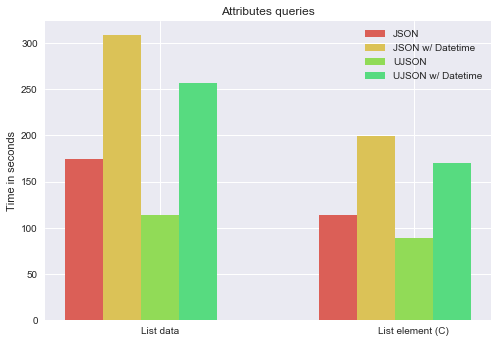

In [15]:
json = [173.92, 113.46]
json_dt = [308.92, 199.46]
ujson = [113.20, 88.81]
ujson_dt = [256.80, 169.79]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'))